In [1]:
from collections import OrderedDict, Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import we_to_signal as wes

[nltk_data] Downloading package punkt to C:\Users\Jorge
[nltk_data]     Hermosillo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jorge
[nltk_data]     Hermosillo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jorge
[nltk_data]     Hermosillo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jorge
[nltk_data]     Hermosillo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Lectura de todos los poemas y categorización por tipo de emoción asociada al léxico

#### Fuente:
- [Automatic Generation of Emotionally Expressive Poetry By Fine-tuning GPT-2 Using Pytorch. Use the Huggingface library to compose original poems embedding the emotion of your choice. Prajwalguptacr. Medium-MLearning.ai.](https://medium.com/mlearning-ai/automatic-generation-of-emotionally-expressive-poetry-by-fine-tuning-gpt-2-using-pytorch-68dace59fca0#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImMzYWZlN2E5YmRhNDZiYWU2ZWY5N2U0NmM5NWNkYTQ4OTEyZTU5NzkiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJhdWQiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJzdWIiOiIxMTE2OTYyNDUxMDY5ODc1NTU2NDkiLCJoZCI6InVhZW0ubXgiLCJlbWFpbCI6ImpoZXJtb3NpbGxvQHVhZW0ubXgiLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwibmJmIjoxNjkzMzM5MjM4LCJuYW1lIjoiSm9yZ2UgSGVybW9zaWxsbyIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BQWNIVHRmQ2l3QnBzRmVNV1ZiOEpZM25EQWZucWFkanFGdl9yWWtpM3M2TVN1eUsydz1zOTYtYyIsImdpdmVuX25hbWUiOiJKb3JnZSIsImZhbWlseV9uYW1lIjoiSGVybW9zaWxsbyIsImxvY2FsZSI6ImVzLTQxOSIsImlhdCI6MTY5MzMzOTUzOCwiZXhwIjoxNjkzMzQzMTM4LCJqdGkiOiI3ZmZmNzJmYmU4YjhkNWEyZjdiNTJmNzhhZjk4ODAxYjdmMTc5NzExIn0.OG_W_kccCJv4TNG-bKxdao1aCTTKA9yVoSmU72FmOGDs_xgSKPuaEKxQis8NUo83rUAlAHDniyYeqtbusqfigAgJBwyynMi8JlgeXLekbYwqmO1Hvh625IdQ72_uPwtw7ZAy6-9RJMgm-Mncb_qMDXF-mO77pxFS5bcvZvdUHTfHTrLS__vLkOnVBd0-lyfkTDgGM0evKdy0f8vKCzcaQc0SaR1pr4Oph3k1DAVIaGm935IAoctayiCyCiT5Jht7Ym4Fa53r5Inb6h7QtK8icB_WD0Ux8VMzBesg0OxGdOsB3UbqIf_x50N7VNDefL3F-b75Sl9LDCJseUnzKBG1dQ)

- https://github.com/prajwalcr/AutoCompose

#### Lista de emociones del conjunto de poemas

In [ ]:
emotion_list = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

### Build Poems DataSet 
- Una vez construidos los archivos se puede comentar esta sección

In [2]:
data_path = "data/"
poems = wes.load_poems_gutenberg(data_path)
poems[:5]
wes.build_poems_dataset(data_path,emotion_list,poems)

### Load Poems DataSet

In [3]:
import os

json_files = sorted([pos_json for pos_json in os.listdir(data_path) if pos_json.endswith('.json')])
json_files.remove('Poems.json')
json_files.remove('missing.json')

em_poems = {}
for e in emotion_list:
    f = open(data_path+e+".json")
    df_ = pd.DataFrame(json.load(f))
    em_poems[e] = df_
em_poems["anger"]


,poem,id
0,i do know this it's nothing i can hold\nlast ...,10
1,the fear o' hell's a hangman's whip\nto haud t...,18
2,but since i laid a hand thereon\nand found a h...,88
3,falsely i pointed to sum in text\nseriously he...,99
4,i'll wear my jealous reflection\njuice of lemo...,125
...,...,...
2461,new snow on a leaf\nlike granulated sugar\nmak...,93124
2462,new earth and old earth\na trio of guardians\n...,93138
2463,destructions despair\nconstructions hope toge...,93217
2464,hot dry summers will\nbake paint right off the...,93226


### Lectura de lineas de poemas para análisis del léxico 

#### Fuente:
- [Repositorio de GitHub de Allison Parrish](https://github.com/aparrish/gutenberg-poetry-corpus/blob/master/quick-experiments.ipynb) 

In [4]:
""" all_lines = []
for line in gzip.open("gutenberg-poetry-v001.ndjson.gz"):
    all_lines.append(json.loads(line.strip())) """

' all_lines = []\nfor line in gzip.open("gutenberg-poetry-v001.ndjson.gz"):\n    all_lines.append(json.loads(line.strip())) '

In [5]:
""" df_lines=pd.DataFrame.from_records(all_lines)
df_lines.head() """

' df_lines=pd.DataFrame.from_records(all_lines)\ndf_lines.head() '

In [6]:
# df_lines.to_pickle("df_lines.pkl")

In [7]:
df_lines = pd.read_pickle("df_lines.pkl")
df_lines = df_lines.sample(frac=0.001,random_state=1)
df_lines.reset_index(inplace=True)
df_lines.drop(columns=["index"],inplace=True)
print(len(df_lines))
df_lines.head()

3085


,s,gid
0,"'""What hath so distressed thee, Polyphemus, th...",1728
1,I wonder if any one ever knew,3628
2,Confusion to your elements ensued.,8799
3,To guide the merry crew.,3525
4,It leaves not one remainder of itself,785


### Construccion de WE

In [8]:
# if lookUpTable is wanted
typesdf_lines_w2v, mmodelo = wes.compute_embeddings(df_lines, embed="w2v", lookUpT=True, columna_docs='s', vec_dim=100)
typesdf_lines_fst, mfst_lines = wes.compute_embeddings(df_lines, embed="fstxt", lookUpT=True, columna_docs='s', vec_dim=100)
typesdf_lines_w2v = typesdf_lines_w2v.dropna()
typesdf_lines_fst = typesdf_lines_fst.dropna()
display(typesdf_lines_w2v)
display(typesdf_lines_fst)
#else no lookUpTable
""" modelo = wes.compute_embeddings(df_lines, embed="w2v", columna_docs='s', vec_dim=100)
fst_lines = wes.compute_embeddings(df_lines, embed="fstxt", columna_docs='s', vec_dim=100)
 """

' modelo = wes.compute_embeddings(df_lines, embed="w2v", columna_docs=\'s\', vec_dim=100)\nfst_lines = wes.compute_embeddings(df_lines, embed="fstxt", columna_docs=\'s\', vec_dim=100)\n '

In [9]:
w2v_lines.save('w2v_lines')
fst_lines.save('fst_lines')

" w2v_lines.save('w2v_lines')\nfst_lines.save('fst_lines') "

In [10]:
from gensim.models import Word2Vec
from gensim.models import FastText

w2v_lines = Word2Vec.load('w2v_lines')
fst_lines = FastText.load('fst_lines')

In [11]:
#vector = mw2v_lines.wv["AUGUSTA"]
palabra = "hath"
w2v_neighbors = w2v_lines.wv.most_similar(palabra, topn=11)
fst_neighbors = fst_lines.wv.most_similar(palabra, topn=11)

print("\nExact W2V Neighbors")
for neighbor in w2v_neighbors:
    print(neighbor)

print("\nExact FSTXT Neighbors")
for neighbor in fst_neighbors:
    print(neighbor)

' palabra = "hath"\nw2v_neighbors = w2v_lines.wv.most_similar(palabra, topn=11)\nfst_neighbors = fst_lines.wv.most_similar(palabra, topn=11)\n\nprint("\nExact W2V Neighbors")\nfor neighbor in w2v_neighbors:\n    print(neighbor)\n\nprint("\nExact FSTXT Neighbors")\nfor neighbor in fst_neighbors:\n    print(neighbor) '

In [12]:
print(w2v_lines.wv.get_normed_vectors()[0])
#print(mw2v_lines.wv.get_vector('the', norm=True))
print(list(w2v_lines.wv.key_to_index)[0])

" print(w2v_lines.wv.get_normed_vectors()[0])\n#print(mw2v_lines.wv.get_vector('the', norm=True))\nprint(list(w2v_lines.wv.key_to_index)[0]) "

In [13]:
display(em_poems["anger"].head())
print(len(em_poems["anger"]))

' display(em_poems["anger"].head())\nprint(len(em_poems["anger"]))\n '

In [14]:
""" sent1 = "This AA BB Ω i$s a s[[]ample0 ῥάβδῳ sentence02.\nAnd another005 <<one>>.\nMoreover, 0101 it is 'filtered'!"
sent2 = em_poems["anger"]["poem"].values.tolist()[0]
print(wes.text_clean(sent2)) """

' sent1 = "This AA BB Ω i$s a s[[]ample0 ῥάβδῳ sentence02.\nAnd another005 <<one>>.\nMoreover, 0101 it is \'filtered\'!"\nsent2 = em_poems["anger"]["poem"].values.tolist()[0]\nprint(wes.text_clean(sent2)) '

In [15]:
""" poems_w2v = {}
poems_fst = {}
for e in emotion_list:
    df = em_poems[e]
    mw2v_poems = wes.compute_embeddings(df, embed="w2v", columna_docs='poem', vec_dim=100)
    mfst_poems = wes.compute_embeddings(df, embed="fst", columna_docs='poem', vec_dim=100)
    poems_w2v[e] = mw2v_poems
    poems_fst[e] = mfst_poems

poems_w2v['anger'].wv.most_similar('night', topn=11) """

' poems_w2v = {}\npoems_fst = {}\nfor e in emotion_list:\n    df = em_poems[e]\n    mw2v_poems = wes.compute_embeddings(df, embed="w2v", columna_docs=\'poem\', vec_dim=100)\n    mfst_poems = wes.compute_embeddings(df, embed="fst", columna_docs=\'poem\', vec_dim=100)\n    poems_w2v[e] = mw2v_poems\n    poems_fst[e] = mfst_poems\n\npoems_w2v[\'anger\'].wv.most_similar(\'night\', topn=11) '

In [16]:
""" for e in emotion_list:
    poems_w2v[e].save("w2v_model_"+e)
    poems_fst[e].save("fst_model_"+e) """

' for e in emotion_list:\n    poems_w2v[e].save("w2v_model_"+e)\n    poems_fst[e].save("fst_model_"+e) '

In [17]:
w2v_poems = {}
fst_poems = {}
for e in emotion_list:
    w2v_poems[e] = Word2Vec.load("w2v_model_"+e)
    fst_poems[e] = FastText.load("fst_model_"+e)
w2v_poems['anger'].wv.most_similar('night', topn=11)

[('by', 0.9998670220375061),
 ('at', 0.9998617768287659),
 ('in', 0.9998592734336853),
 ('with', 0.999859094619751),
 ('he', 0.9998566508293152),
 ('its', 0.9998500347137451),
 ('where', 0.9998493194580078),
 ('to', 0.9998488426208496),
 ('all', 0.999847948551178),
 ('through', 0.9998472332954407),
 ('that', 0.9998447895050049)]

# Preguntas
- ¿Qué palabras tienen embeddings "fuertes" y cuáles embeddings "débiles"?
    - Marcar inicio y fin de los embeddings
    - Imprimir estas palabras
    - Calcular la frecuencia de las palabras y observar si hay relación
- ¿Las potencias son similares, y las fases?
    - Calcular espectro de las fases
- ¿El patrón de estas frases similar a al patrón de frases de otro tipo de corpus?
    - 20NewsGroups
    - Poemas clasificados por tipo de emoción.
- ¿Qué tan predecibles son las palabras a partir de los embeddings?
    - Usar MAXENT para predecir las últimas dos palabras y sacar la estadística de predictibilidad

### Construye la señal y Calcula el espectro en función del modelo

In [18]:
df_lines

,s,gid
0,"'""What hath so distressed thee, Polyphemus, th...",1728
1,I wonder if any one ever knew,3628
2,Confusion to your elements ensued.,8799
3,To guide the merry crew.,3525
4,It leaves not one remainder of itself,785
...,...,...
3080,"Or clearly sung his true, true thought,",1229
3081,"Poor Lucy Lake was overgrown,",2622
3082,And laughter in his eyes;,34235
3083,"Shall reach Italia, and her ports attain.",18466


In [82]:
datosw2v = df_lines.copy()
datosfst = df_lines.copy()
datosw2v = wes.build_data(datosw2v,'s',w2v_lines,norm=True)
datosfst = wes.build_data(datosfst,'s',fst_lines,norm=True)
print(len(datosw2v))
print(len(datosfst))
display(datosw2v.head())
display(datosfst.head())


Getting TEXT from column: s
Getting TEXT from column: s
2754
1517


,s,gid,signal,TokenS
0,Whar I can see what's goin'.,1229,"[-0.05851683393120766, 0.13704824447631836, -0...","[(Whar, 1), (I, 250), (can, 28), (see, 24), (w..."
1,With his rifle. Swift he shot,31305,"[-0.07893873751163483, 0.09264221787452698, -0...","[(With, 52), (his, 176), (rifle, 1), (Swift, 2..."
2,"Above its own sad, plaintive melody,",2491,"[-0.1199665516614914, -0.015363491140305996, -...","[(Above, 3), (its, 42), (own, 24), (sad, 7), (..."
3,Launched deadly forward. Shield to savage shield,33686,"[-0.15363860130310059, -0.13223306834697723, -...","[(Launched, 1), (deadly, 1), (forward, 1), (Sh..."
4,He dreamed him at _Clod-Hall_ again;,24334,"[-0.05262283980846405, 0.10035523772239685, -0...","[(He, 47), (dreamed, 2), (him, 50), (at, 70), ..."


,s,gid,signal,TokenS
0,When gentle eyes that scarce for tears,8187,"[-0.024252494797110558, -0.0036065562162548304...","[(When, 30), (eyes, 18), (that, 141), (for, 71..."
1,And ghastly famine made to serve his ends?,602,"[-0.024195613339543343, -0.005226767621934414,...","[(And, 162), (made, 13), (to, 237), (serve, 5)..."
2,"Half-waking. One, with dimpled arms in sleep",24679,"[-0.023077789694070816, -0.003821789752691984,...","[(One, 8), (with, 121), (arms, 6), (in, 194), ..."
3,Are things that seemed the phantoms of their t...,1383,"[-0.023616984486579895, -0.009163504466414452,...","[(Are, 2), (things, 15), (that, 141), (seemed,..."
4,"Guided by her, along the mountain road,",4272,"[-0.02400679513812065, -0.004487605299800634, ...","[(by, 56), (her, 73), (along, 5), (the, 707), ..."


In [83]:
def embed_spectra(df,modelo,norma=False):
    freqs = {}
    for l in df.TokenS.values.tolist(): 
        for w,f in l:
            if f not in freqs:
                freqs[f] = [w]
            else:
                freqs[f].append(w)
    freqs = dict(sorted(freqs.items(), key=lambda item: item[0]))
    ms = {}
    for f in freqs.keys():
        s = []
        for w in freqs[f]:
            data = modelo.wv.get_vector(w,norm=norma)
            _,spectrum = wes.get_spectra_predict(data,predict=False)
            s.append(spectrum[1])
        ms[f] = np.mean(s,axis=0)
    return ms
msw2v = embed_spectra(datosw2v,w2v_lines,norma=True)
msfst = embed_spectra(datosfst,w2v_lines,norma=True)

Text(0.5, 1.0, 'Espectros promedio por frecuencia de ocurrencia de términos \n FST (Norm=True)')

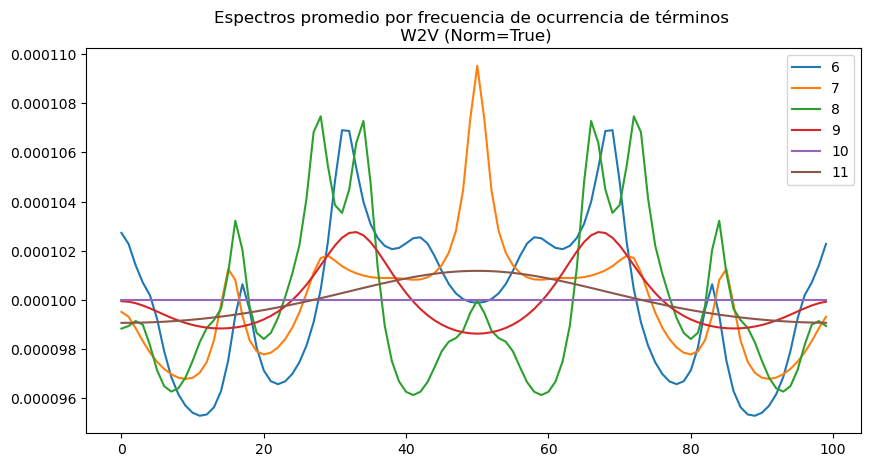

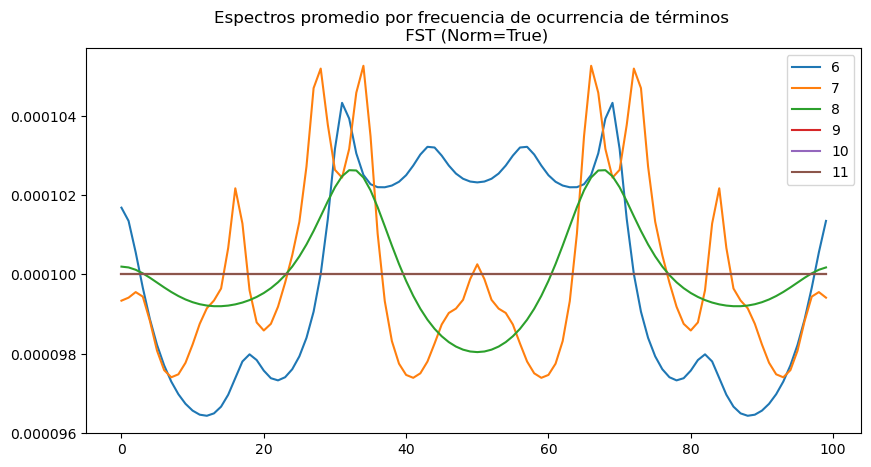

In [88]:
datos_w2v = msw2v.copy()
datos_fst = msfst.copy()
datos_w2v = wes.partition(list(msw2v.keys()),10)
datos_fst = wes.partition(list(msfst.keys()),10)
parte = 6

legendw2v = [str(f) for f in list(msw2v.keys())[5:11]]
legendfst = [str(f) for f in list(msw2v.keys())[5:11]]
plt.figure(figsize=(10,5))
for f in list(msw2v.keys())[5:11]:
    plt.plot(msw2v[f])
plt.legend(legendw2v)
plt.title(f"Espectros promedio por frecuencia de ocurrencia de términos \n W2V (Norm=True)")

plt.figure(figsize=(10,5))
for f in list(msfst.keys())[5:11]:
    plt.plot(msfst[f])
plt.legend(legendfst)
plt.title(f"Espectros promedio por frecuencia de ocurrencia de términos \n FST (Norm=True)")


In [20]:
idx = datosfst.signal.apply(lambda x: len(x)).idxmin()
print(idx)
print(len(datosfst.iloc[idx].signal))

0
500


signal.shape: (900,)


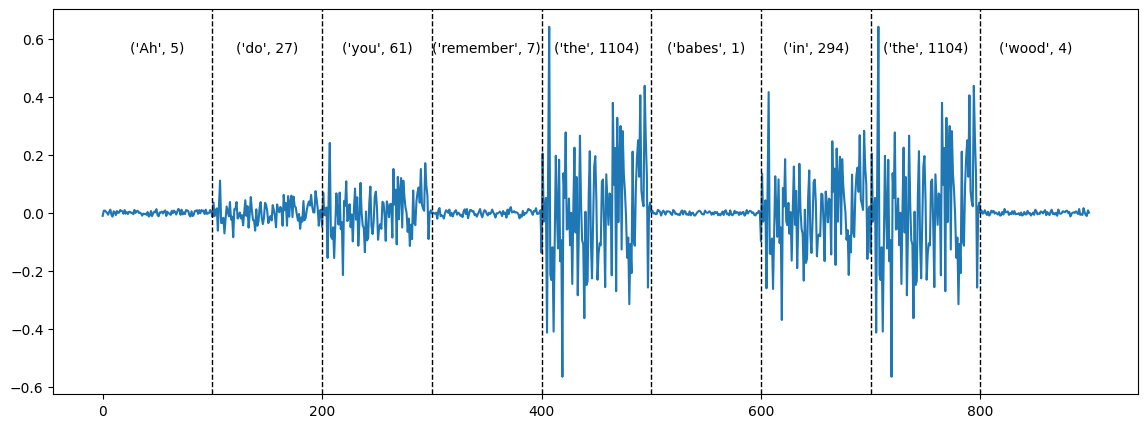

['Ah', 'do', 'you', 'remember', 'the', 'babes', 'in', 'the', 'wood']
(900,)


In [21]:
signal,words_signal = wes.get_signal(datosw2v,71,plot=True)
print(words_signal)
print(signal.shape)

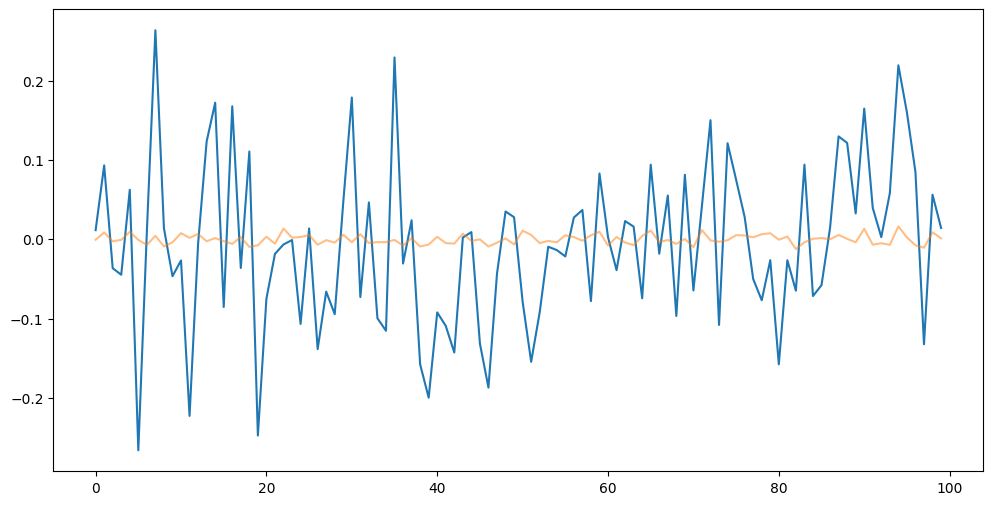

In [22]:
prediction,spectrum = wes.get_spectra_predict(signal,'maxent')
if not prediction is None:
    fig, ax = plt.subplots(figsize=(12,6))
    real_sig = signal[-len(prediction):]
    #shifted_s = np.pad(prediction, (len(signal)-len(prediction), 0), 'constant', constant_values=(0, 0))
    ax.plot(prediction) 
    ax.plot(real_sig,alpha=0.5) 
    #ax.set_xlim(len(signal)-len(prediction),len(signal))
    plt.show()


0.2692529526665062 0.006750720349591298


In [32]:
def prediction_stats(df,modelo,norm=False,nh=10):
    from matplotlib import cm
    from scipy import stats
    
    c_aciertos = 0
    c_fallas = 0
    aciertos = []
    c_error_p = 0
    corr=0
    for idx,row in df.iterrows():
        signal,_ = wes.get_signal(df,idx,norm=norm)
        prediction,_ = wes.get_spectra_predict(signal,'maxent')
        real_w = row.TokenS[-1][0]
        if prediction is None:
            c_error_p += 1
            vec_size = len(modelo.wv.get_vector(list(modelo.wv.key_to_index)[0]))
            wep = np.random.rand(vec_size)
            wep = wep / np.linalg.norm(wep)
        else:
            wep = prediction
            real_sig = signal[-len(prediction):]
            sim = stats.pearsonr(real_sig, prediction)
            if sim.statistic >= 0.9 and sim.pvalue <= 0.01:
                corr += 1

        neighbors, true_neighbors = wes.predict_word_neighbors(wep,modelo,real_w,nh)
        neighbors = [n for n,s in neighbors]
        true_neighbors = [n for n,s in true_neighbors]
        if len(set(neighbors) & set(true_neighbors)) != 0:
            c_aciertos += 1
            aciertos.append((idx,row.gid,len(row.TokenS)))
        else:
            c_fallas += 1
    conteos = Counter(e[2] for e in aciertos)
    ta = c_aciertos/len(df)*100
    tf = c_fallas/len(df)*100
    tasas = [f"{ta:2.0f}%",f"{tf:2.0f}%"]
    print(f"La tasa de error de predicción fue del: {c_error_p/len(df)*100:2.2f}%")
    plt.figure()
    grafico = plt.bar(['Aciertos','Fallas'],[c_aciertos,c_fallas], color=['g','r'], width=0.5)
    plt.bar_label(grafico, labels=tasas)
    
    plt.figure()
    cont = Counter(e[2] for e in aciertos)
    cont = dict(sorted(cont.items(), key=lambda item: item[1],reverse=True))
    etiquetas = [str(key) for key in cont.keys()]
    conteos = [val for val in cont.values()]
    if len(conteos)>0:
        colors = cm.hsv(np.asarray(conteos) / float(max(np.asarray(conteos))))
        plt.bar(etiquetas,conteos,label=etiquetas, color=colors)
        plt.legend()
    else:
        print("lista vacía")
    return corr
  

La tasa de error de predicción fue del: 1.02%
datos correlacionados en mas del 90% con p<= 1%: 55


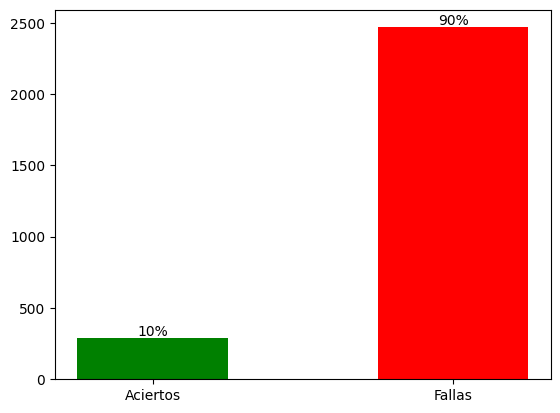

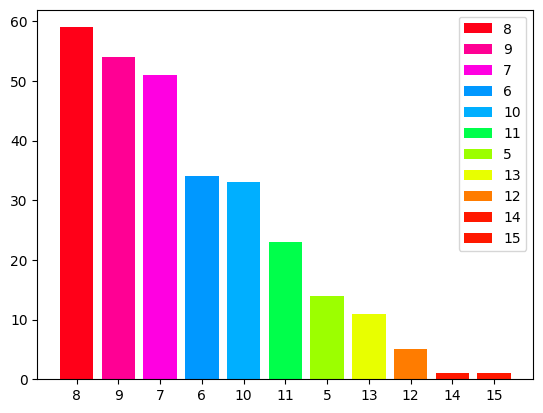

In [33]:
corr = prediction_stats(datosw2v,w2v_lines,nh=10)
print(f'datos correlacionados en mas del 90% con p<= 1%: {corr}; i.e. {corr/len(datosw2v)*100:2.2f}%')

La tasa de error de predicción fue del: 1.02%
datos correlacionados en mas del 90% con p<= 1%: 56


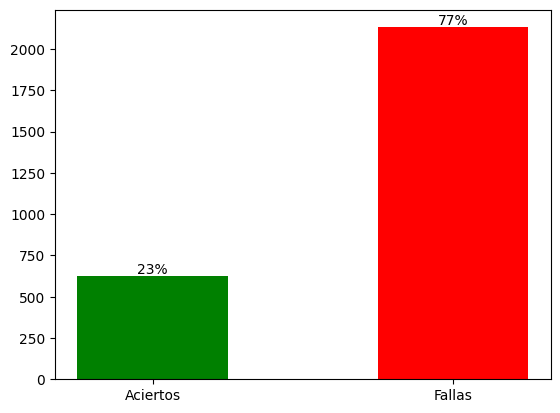

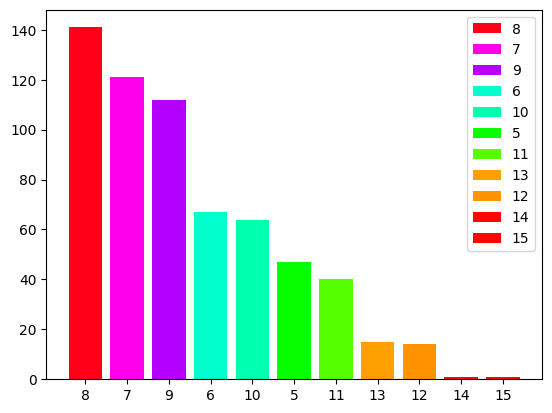

In [34]:
corr = prediction_stats(datosw2v,w2v_lines,nh=20)
print(f'datos correlacionados en mas del 90% con p<= 1%: {corr}; i.e. {corr/len(datosw2v)*100:2.2f}%')

La tasa de error de predicción fue del: 0.00%
datos correlacionados en mas del 90% con p<= 1%: 1272


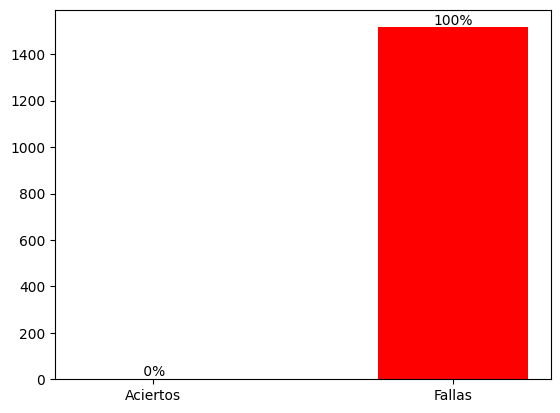

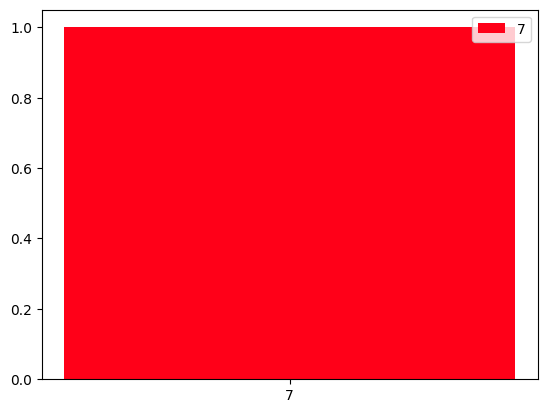

In [35]:
corr = prediction_stats(datosfst,fst_lines,nh=10)
print(f'datos correlacionados en mas del 90% con p<= 1%: {corr}; i.e. {corr/len(datosfst)*100:2.2f}%')

La tasa de error de predicción fue del: 0.00%
datos correlacionados en mas del 90% con p<= 1%: 1272


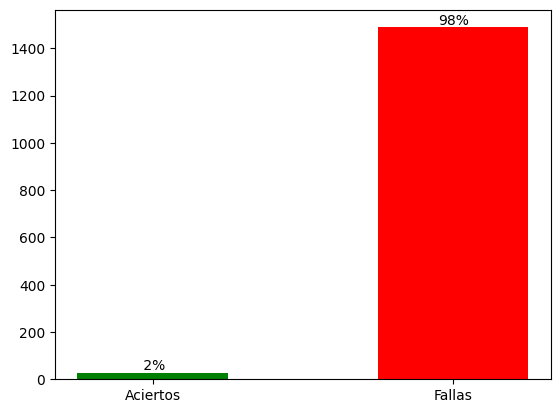

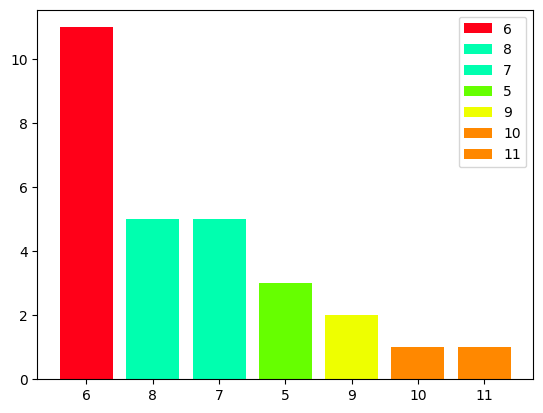

In [36]:
corr = prediction_stats(datosfst,fst_lines,nh=20)
print(f'datos correlacionados en mas del 90% con p<= 1%: {corr}; i.e. {corr/len(datosfst)*100:2.2f}%')

### CANCIONES
- Itsy Betsy Spider
- Row Row Row your boat
- London bridge